In [2]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
print("Dataset shape (rows, columns):")
print(df.shape)
print("\nColumn names:")
print(df.columns)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nStatistical summary:")
print(df.describe())


Dataset shape (rows, columns):
(200, 5)

Column names:
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Last 5 rows:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199       

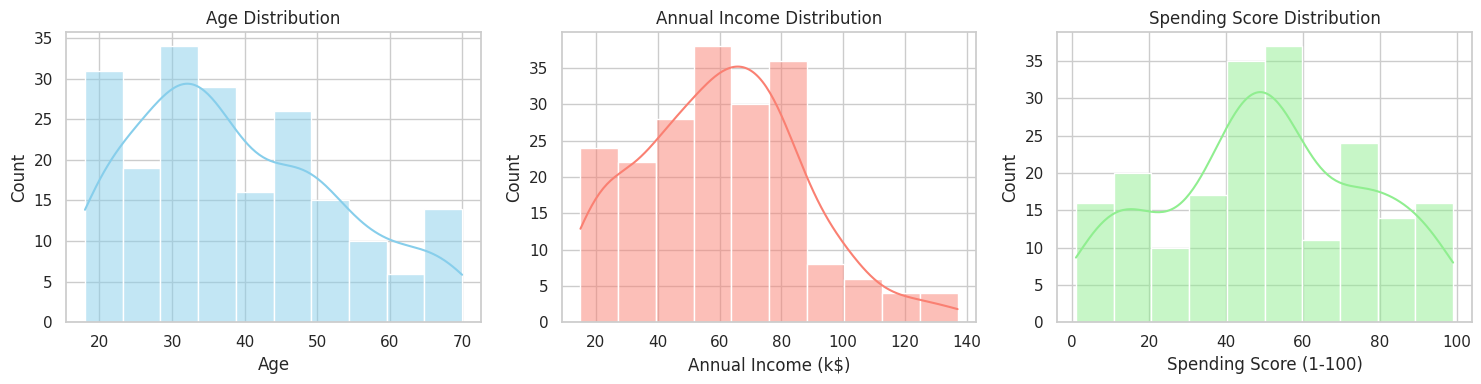

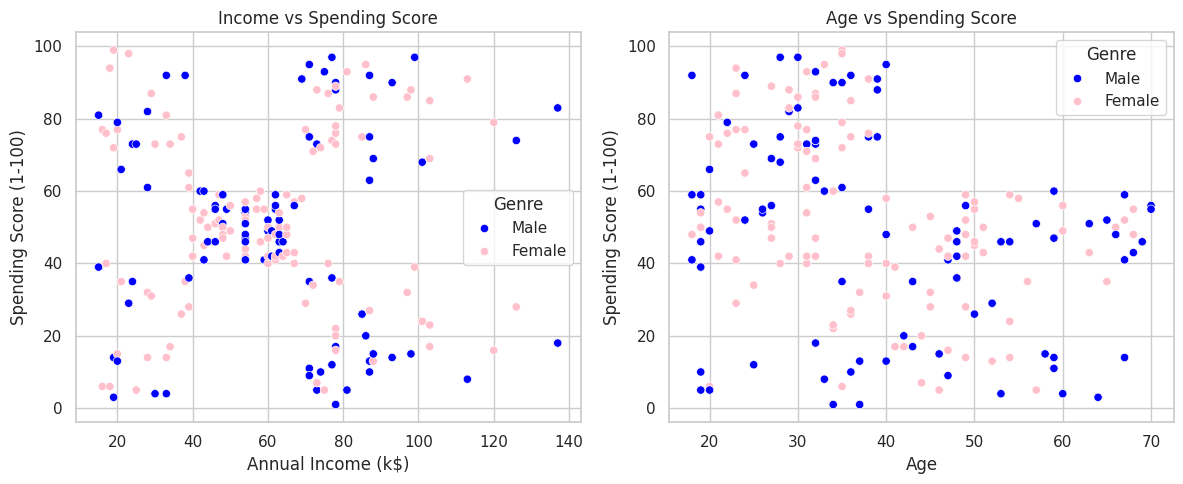

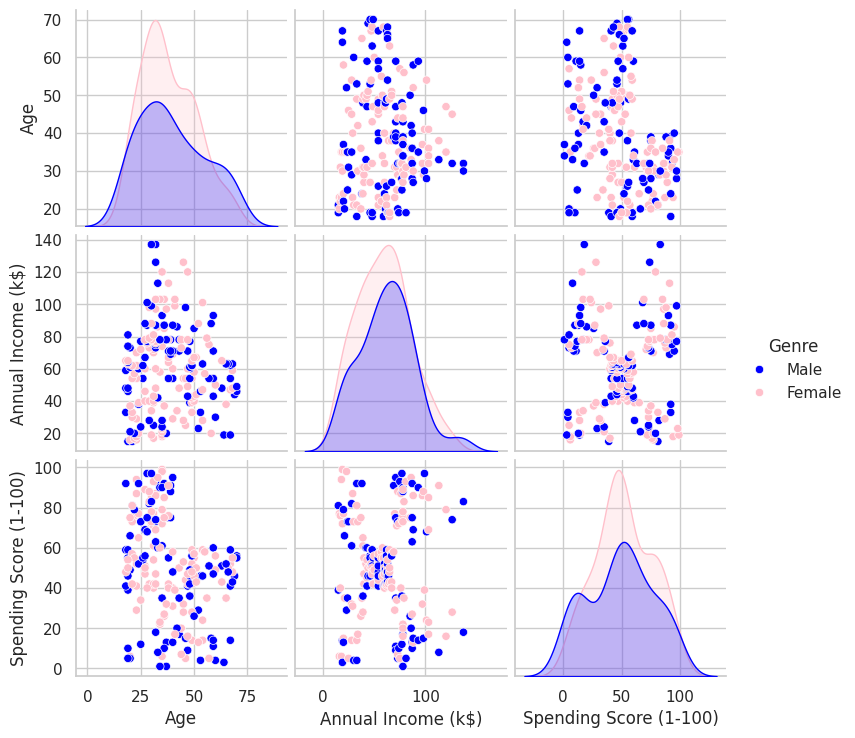

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Feature distributions
plt.figure(figsize=(15,4))

# Age distribution
plt.subplot(1,3,1)
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Age Distribution")

# Annual Income distribution
plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True, color='salmon')
plt.title("Annual Income Distribution")

# Spending Score distribution
plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True, color='lightgreen')
plt.title("Spending Score Distribution")

plt.tight_layout()
plt.show()


# 3. Scatter plots to see relationships

plt.figure(figsize=(12,5))

# Income vs Spending Score
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Genre', palette=['blue','pink'])
plt.title("Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# Age vs Spending Score
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Genre', palette=['blue','pink'])
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()


sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)','Genre']],
             hue='Genre', palette=['blue','pink'], height=2.5)
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows before scaling:\n", X[:5])
print("\nFirst 5 rows after scaling:\n", X_scaled[:5])


First 5 rows before scaling:
 [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]

First 5 rows after scaling:
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


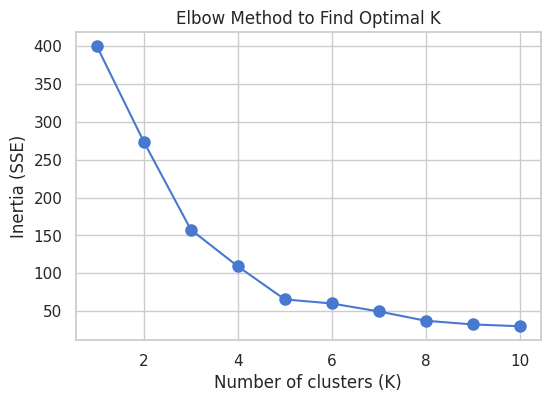

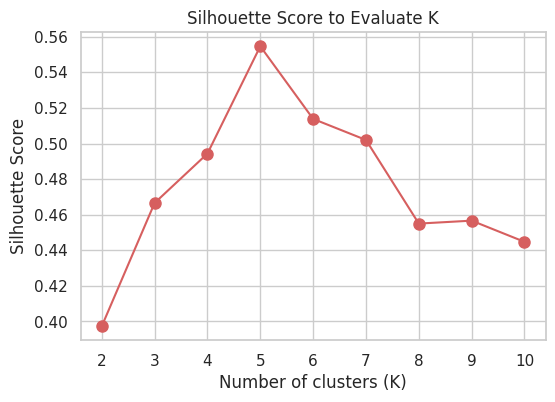

K=2, Silhouette Score=0.397
K=3, Silhouette Score=0.467
K=4, Silhouette Score=0.494
K=5, Silhouette Score=0.555
K=6, Silhouette Score=0.514
K=7, Silhouette Score=0.502
K=8, Silhouette Score=0.455
K=9, Silhouette Score=0.457
K=10, Silhouette Score=0.445


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []  # Sum of squared distances
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method to Find Optimal K")
plt.show()

# Silhouette Score Method
silhouette_scores = []

# K must be at least 2 for silhouette score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(6,4))
plt.plot(range(2,11), silhouette_scores, 'ro-', markersize=8)
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score to Evaluate K")
plt.show()

# Optional: print scores
for k, score in zip(range(2,11), silhouette_scores):
    print(f"K={k}, Silhouette Score={score:.3f}")


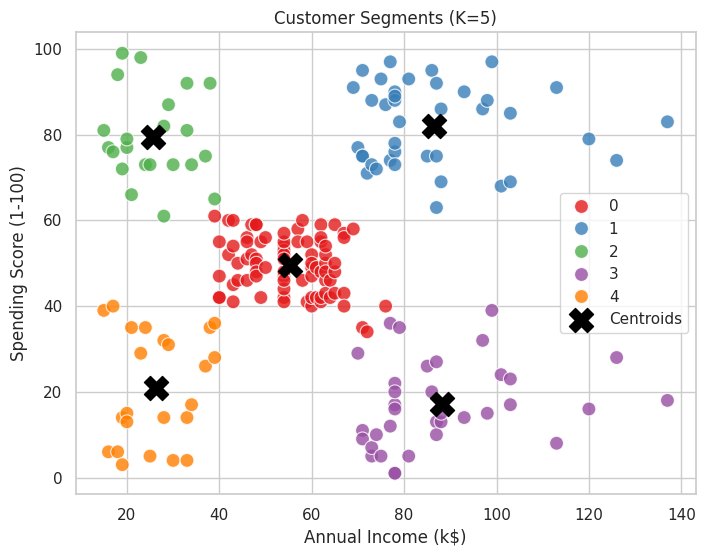

In [6]:
# Apply K-Means with K=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Assign cluster labels to the original dataframe
df['Cluster'] = labels

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100,
    alpha=0.8
)

centers = kmeans.cluster_centers_
centers_unscaled = scaler.inverse_transform(centers)
plt.scatter(
    centers_unscaled[:,0],
    centers_unscaled[:,1],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title("Customer Segments (K=5)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()





In [7]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'  # number of customers in each cluster
}).rename(columns={'CustomerID': 'Count'})

print("Cluster Summary (Mean values):\n")
print(cluster_summary)

cluster_labels = {
    0: 'Average',     # Center cluster
    1: 'VIP',         # High income, high spender
    2: 'Impulsive',   # Low income, high spender
    3: 'Savers',      # High income, low spender
    4: 'Budget'       # Low income, low spender
}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

print("\nSample of customers with cluster labels:\n")
print(df[['CustomerID','Annual Income (k$)','Spending Score (1-100)','Cluster','Cluster_Label']].head())

Cluster Summary (Mean values):

               Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                              
0        42.716049           55.296296               49.518519     81
1        32.692308           86.538462               82.128205     39
2        25.272727           25.727273               79.363636     22
3        41.114286           88.200000               17.114286     35
4        45.217391           26.304348               20.913043     23

Sample of customers with cluster labels:

   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster  \
0           1                  15                      39        4   
1           2                  15                      81        2   
2           3                  16                       6        4   
3           4                  16                      77        2   
4           5                  17                      40        4   

  Cluster_Labe

/tmp/ipython-input-3611903268.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Annual Income (k$)', data=summary, palette='Set2')


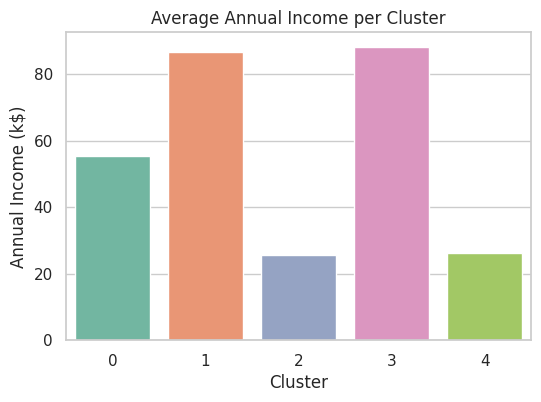

/tmp/ipython-input-3611903268.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Spending Score (1-100)', data=summary, palette='Set3')


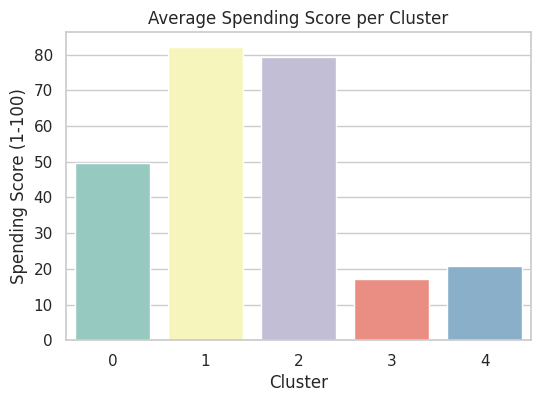

/tmp/ipython-input-3611903268.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Age', data=summary, palette='pastel')


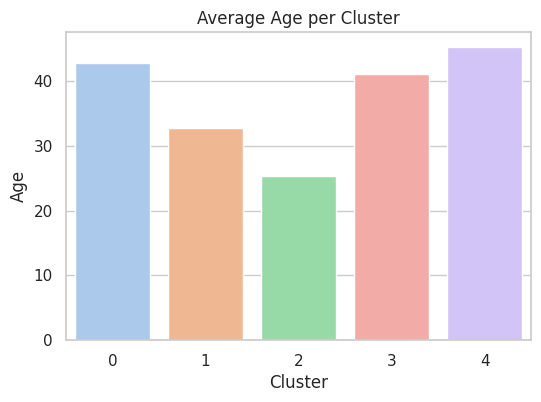

In [8]:
summary = cluster_summary.reset_index()

# Average Annual Income per Cluster
plt.figure(figsize=(6,4))
sns.barplot(x='Cluster', y='Annual Income (k$)', data=summary, palette='Set2')
plt.title("Average Annual Income per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Annual Income (k$)")
plt.show()

# Average Spending Score per Cluster
plt.figure(figsize=(6,4))
sns.barplot(x='Cluster', y='Spending Score (1-100)', data=summary, palette='Set3')
plt.title("Average Spending Score per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Average Age per Cluster
plt.figure(figsize=(6,4))
sns.barplot(x='Cluster', y='Age', data=summary, palette='pastel')
plt.title("Average Age per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()
